<a href="https://colab.research.google.com/github/TamaVux/PdM/blob/main/supp_notebook/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [2]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
# # For EDA
# !pip install ydata-profiling
# import ydata_profiling as pdpf

# FOLDER_PATH

In [4]:
DRIVE_PATHS = '/content/drive/MyDrive/ColabProjects'
PROJECT_NAME = 'PdM'
DRIVE_FOLDERS = {
    'DATASET': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset'),
    'MODEL': os.path.join(DRIVE_PATHS,PROJECT_NAME,'model'),
    'PRONOSTIA': os.path.join(DRIVE_PATHS,PROJECT_NAME,'dataset','Pronostia'),
}

# IMPORT EXAMPLES
Using:
* Pronostia

## Pronostia
df_down13

In [131]:
from natsort import natsorted
paths_bear13_list = natsorted(glob.glob(os.path.join(DRIVE_FOLDERS['PRONOSTIA'],'Full_Test_Set','Bearing1_3','*')))

header = ['hour','min','sec','mi_sec','h_acc','v_acc']
dataframe = []
for data in paths_bear13_list:
  df = pd.read_csv(data,header=None,names=header)
  dataframe.append(df)
df_bear13 = pd.concat(dataframe)
df_bear13.reset_index(drop=True, inplace=True)

### Down sampling
For pronostia


In [132]:
def mine_down_sampling(df,bin_size = 256, aggregation = 'mean'):
  # Calculate the number of bins
  num_bins = len(df) // bin_size

  # Reshape the dataframe into bins
  bins = [df[i * bin_size:(i + 1) * bin_size] for i in range(num_bins)]

  # Perform the aggregation for each bin
  if aggregation == 'mean':
      downsampled_df = pd.DataFrame([bin.mean() for bin in bins])
  elif aggregation == 'min':
      downsampled_df = pd.DataFrame([bin.min() for bin in bins])
  elif aggregation == 'max':
      downsampled_df = pd.DataFrame([bin.max() for bin in bins])
  else:
      raise ValueError("Invalid aggregation method. Please choose 'mean', 'min', or 'max'.")

  return downsampled_df

In [133]:
df_down13 = mine_down_sampling(df_bear13,bin_size=256)

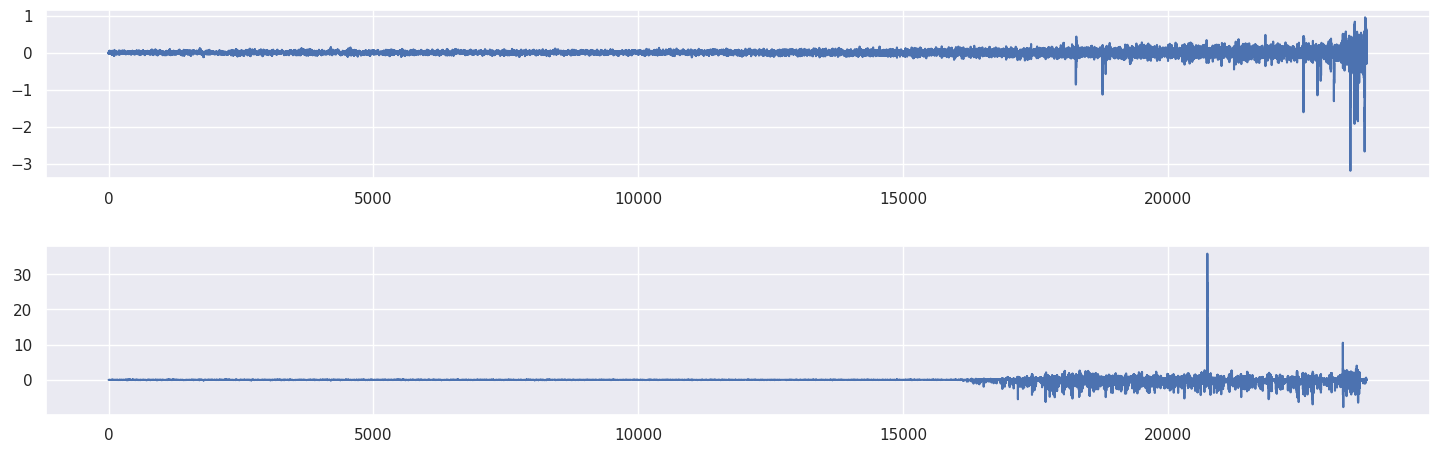

In [134]:
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(15,5))
ax1.plot(df_down13['h_acc'])
fig.tight_layout(pad=2)
ax2.plot(df_down13['v_acc'])

## Preview the data

Pronostia

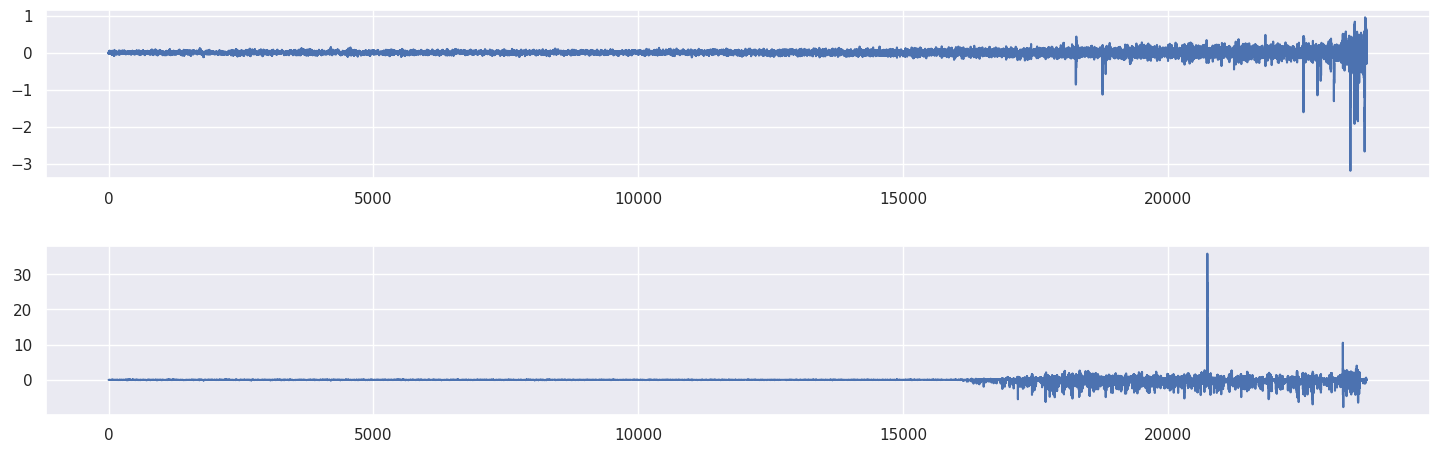

In [31]:
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(15,5))
ax1.plot(df_down13['h_acc'])
fig.tight_layout(pad=2)
ax2.plot(df_down13['v_acc'])

# HANDLING OUTLIER

**MUST:** Understand the nature of the outliers. Before taking any action, it's crucial to investigate the outliers and understand why they exist. Outliers can occur due to various reasons, such as measurement errors, data entry mistakes, natural variations, or genuinely unusual observations. Understanding the `context and source` of outliers can help in determining the appropriate approach for handling them.

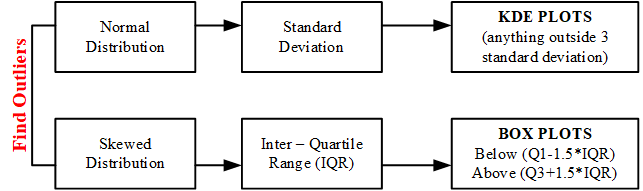

KDE PLOTs: A smoothier version of histogram.

BOX PLOTs:



## Detecting

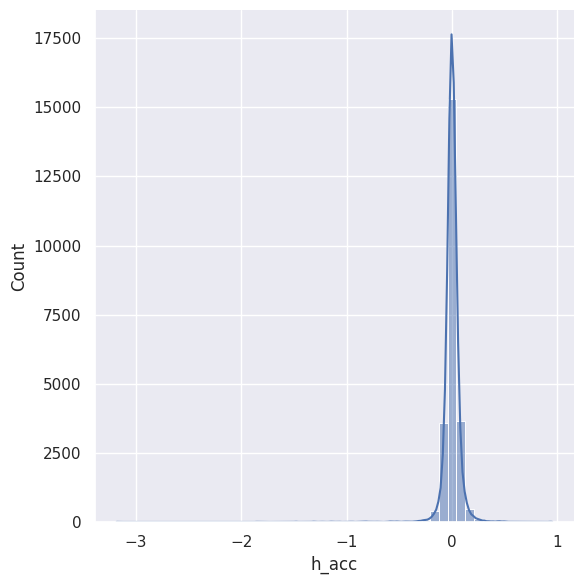

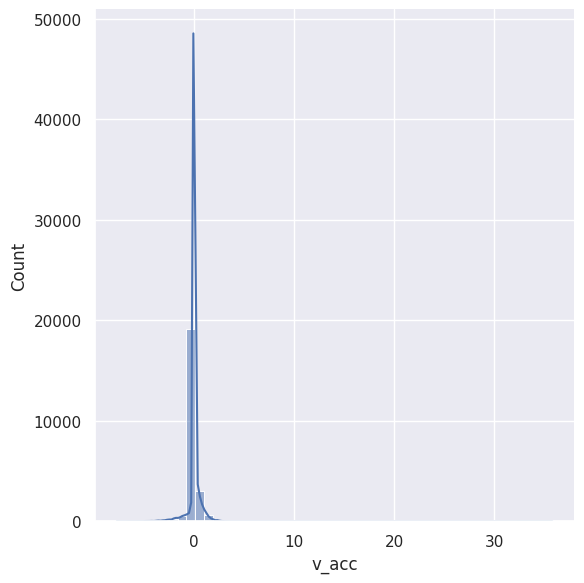

In [138]:
# KDE - histogram
sns.displot(df_down13['h_acc'],kde=True,bins= 50,height =6)
sns.displot(df_down13['v_acc'],kde=True,bins= 50,height =6)

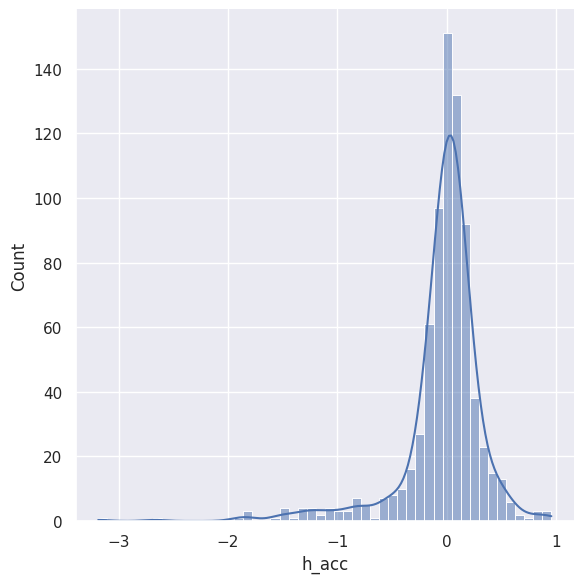

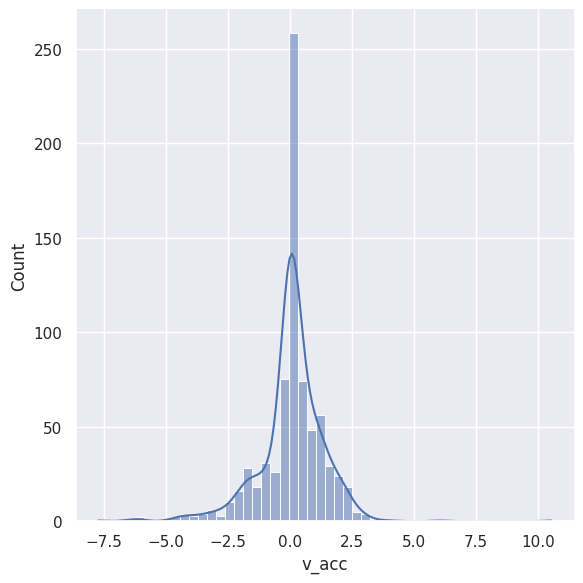

In [32]:
sns.displot(df_down13['h_acc'][23000:],kde=True,bins= 50,height =6)
sns.displot(df_down13['v_acc'][23000:],kde=True,bins= 50,height =6)

BOX PLOTS

<Axes: >

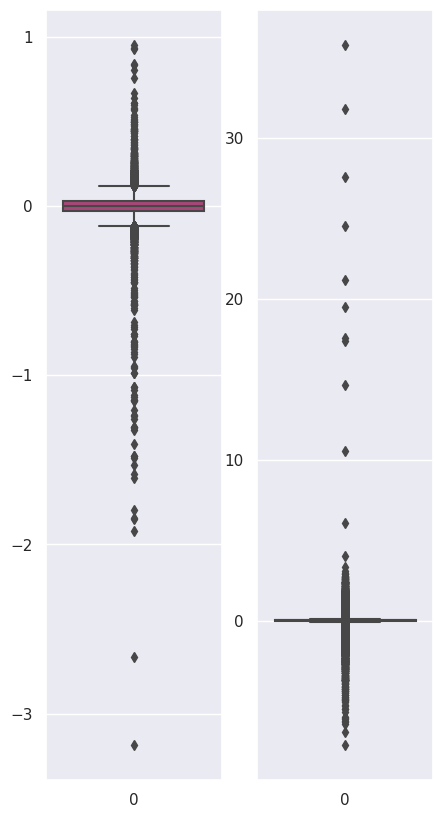

In [37]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(5,10))
sns.boxplot(data = df_down13['h_acc'], palette="magma",ax = ax1)
sns.boxplot(data = df_down13['v_acc'], palette="magma",ax = ax2)

In [166]:
class mine_outlier:
  def __init__(self,df):
    self.df = df
    print(len(self.df))
    #self.df.plot(subplots = True, layout = (6,5), figsize = (10,10))

  ### --- ### DETECTING OUTLIERS        ### --- ###
  ## Take 'col' as a list and calculate iqr. Can specify the lower and upper quantitle for more custome
  def cal_iqr(self, columns, up_quantile = 0.75, low_quantile = 0.25):
    for col in columns:
      print(col)
      q1 = self.df[col].quantile(low_quantile)
      q3 = self.df[col].quantile(up_quantile)
      iqr = q3 - q1
      max_limit = q3 + (1.5 * iqr)
      min_limit = q1 - (1.5 * iqr)
      print('---> For column \'{}\':\n\tq1: \t{}\n\tq3: \t{}\n\tiqr: \t{}\n\tmax: \t{}\n\tmin: \t{}\n'.format(col,q1,q3,iqr,max_limit,min_limit))

    return None
  ## Plot the KDE plot ,with quantitle to choose if wanted
  def kde(self,col,quantitle_plot = False):
    sns.displot(self.df[col],kde = True,bins= 50,height=5, aspect=1.5)

    if quantitle_plot:
      q = []
      for i in range(0,9):
        q.append(df[col].quantile(0.1*(i+1)))
        plt.axvline(q[i], linestyle='--', label=f'{(i+1) * 10}%', color= 'C{}'.format(i))
        plt.legend()

    return None
  ### --- ### DEALING WITH OUTLIERS       ### --- ###


23750


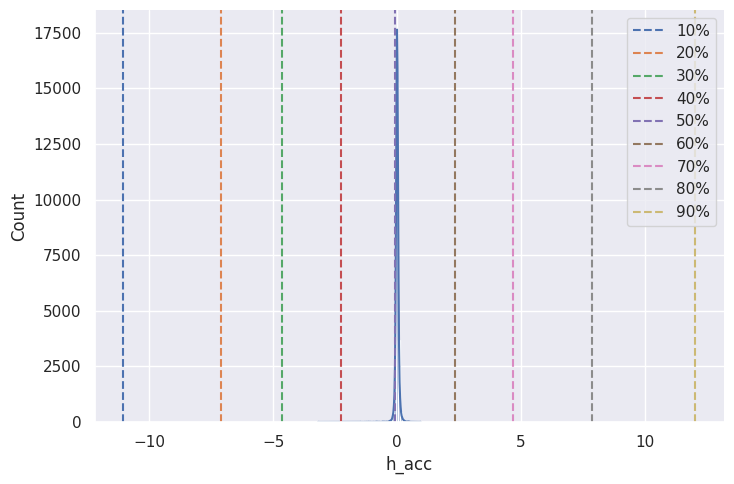

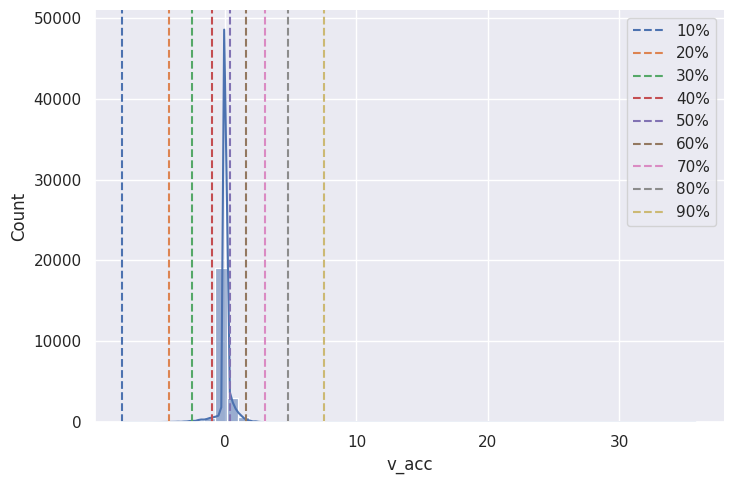

In [167]:
outlier = mine_outlier(df_down13)
outlier.kde('h_acc',quantitle_plot = True)
outlier.kde('v_acc',quantitle_plot = True)